##Case Study - Churn Prediction

A ride-sharing company (Company X) is interested in predicting rider retention.
To help explore this question, we have provided a sample dataset of a cohort of 
users who signed up for an account in January 2014. The data was pulled on July 1, 2014; 
we consider a user retained if they were “active” (i.e. took a trip) in 
the preceding 30 days (from the day the data was pulled). Assume the latest day of
`last_trip_date` to be when the data was pulled. The data is `churn.csv` in the 
[data](data) folder.

We would like you to use this data set to help understand **what factors are the best
predictors for retention**, and offer suggestions to operationalize those insights to 
help Company X. Therefore, your task is not only to build a model that minimizes error,
but also a model that allows you to interpret the factors that contributed to your predictions.

Here is a detailed description of the data:

```
city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form `YYYYMMDD`
last_trip_date: the last time this user completed a trip; in the form `YYYYMMDD`
avg_dist: the average distance (in miles) per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips 
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
luxury_car_user: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday
```

##Work Flow

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
   data for this analysis.
   
2. Build a predictive model to help determine whether or not a user will be retained.

3. Evaluate the model
 
4. Identify / interpret features that are the most influential in affecting your predictions

5. Discuss the validity of your model. Issues such as [leakage](https://www.kaggle.com/wiki/Leakage)

6. Repeat 2 - 5 until you have a satisfactory model
   
##Deliverables

- Code you used to build the model (submit via pull request)

- A (verbal) presentation including the following points:
    - How did you compute the target?
    - What model did you use in the end? Why?
    - Alternative models you considered? Why are they not good enough?
    - What performance metric did you use? Why?
    - Based on insights from the model, what actionable plans do you propose to reduce churn?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/churn.csv')
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [4]:
df[df['last_trip_date'] > '2014-06-01']

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
13,3.04,5.0,4.0,1.38,King's Landing,2014-06-08,iPhone,2014-01-29,50.0,0,False,50.0
16,10.86,3.0,5.0,1.00,King's Landing,2014-06-28,Android,2014-01-11,0.0,1,True,50.0
17,2.38,4.8,3.9,1.00,King's Landing,2014-07-01,iPhone,2014-01-12,0.0,0,True,95.2
18,6.83,4.8,4.6,1.21,King's Landing,2014-06-24,iPhone,2014-01-28,30.8,6,True,80.8
19,12.08,5.0,5.0,1.17,King's Landing,2014-06-03,iPhone,2014-01-02,33.3,0,False,66.7
23,7.74,5.0,5.0,1.00,King's Landing,2014-06-13,Android,2014-01-21,0.0,0,True,100.0
28,5.97,5.0,NaN,1.50,Winterfell,2014-06-08,iPhone,2014-01-19,100.0,0,False,0.0


In [3]:
df[df['phone'].isnull()] = 'other'
df['phone'].unique()

array(['iPhone', 'Android', 'other'], dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null object
avg_rating_by_driver      49802 non-null object
avg_rating_of_driver      41974 non-null object
avg_surge                 50000 non-null object
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null object
trips_in_first_30_days    50000 non-null object
luxury_car_user           50000 non-null object
weekday_pct               50000 non-null object
dtypes: object(12)
memory usage: 4.6+ MB


In [4]:
df_dropped_na = df.dropna()
df_dropped_na.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5,5,1,Astapor,2014-05-05,Android,2014-01-29,0,0,False,50
2,0.77,5,4.3,1,Astapor,2014-01-07,iPhone,2014-01-06,0,3,False,100
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20,9,True,80
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5,3.5,1,Winterfell,2014-06-06,iPhone,2014-01-09,0,2,True,100
7,2.04,5,5,1,Winterfell,2014-01-29,iPhone,2014-01-28,0,2,False,100
8,4.36,5,4.5,1,Winterfell,2014-02-01,Android,2014-01-21,0,2,False,100
10,4.28,4.9,5,1,Winterfell,2014-05-30,iPhone,2014-01-13,0,1,True,100
11,3.81,5,4,1,Winterfell,2014-01-10,iPhone,2014-01-06,0,3,False,100


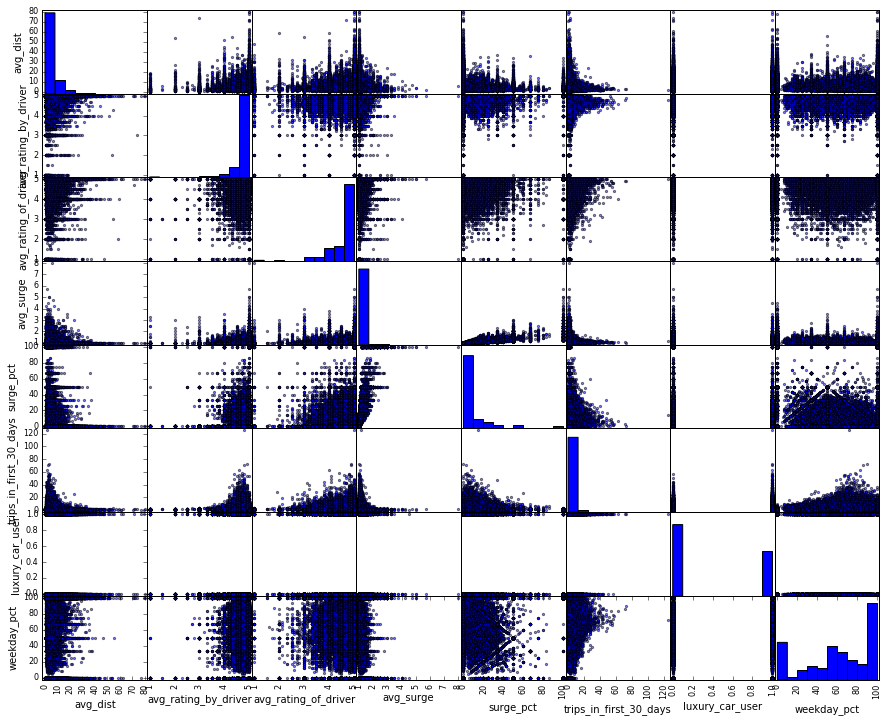

In [6]:
# Scatterplot matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_dropped_na, figsize=(15,12));

In [5]:
df_dropped_na['active'] = (df_dropped_na["last_trip_date"] > "2014-06-01").astype(int)

/Users/User1/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
df_dropped_na

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0
10,4.28,4.9,5.0,1.00,Winterfell,2014-05-30,iPhone,2014-01-13,0.0,1,True,100.0,0
11,3.81,5.0,4.0,1.00,Winterfell,2014-01-10,iPhone,2014-01-06,0.0,3,False,100.0,0


In [6]:
df_classified = df_dropped_na.drop("trips_in_first_30_days",axis=1)
df_classified.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,luxury_car_user,weekday_pct,active
0,3.67,5,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,True,46.2,1
1,8.26,5,5,1,Astapor,2014-05-05,Android,2014-01-29,0,False,50,0
2,0.77,5,4.3,1,Astapor,2014-01-07,iPhone,2014-01-06,0,False,100,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20,True,80,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,False,82.4,0


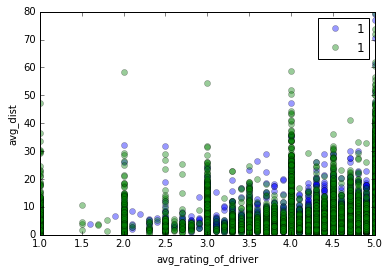

In [23]:
# Scatter plot by category
actives = df_dropped_na['active'].unique()
for active in actives:
    plt.plot(df_classified.loc[df_classified.active==active,'avg_rating_of_driver'], 
             df_classified.loc[df_classified.active==active,'avg_dist'], 
             linestyle='',
             marker='o',
             alpha=.4,
             label=origin)
plt.xlabel('avg_rating_of_driver')
plt.ylabel('avg_dist')
plt.legend(numpoints=1)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.preprocessing

X = df_classified.drop(['active', 'last_trip_date',"signup_date"], axis=1)
y = df_classified['active']
enc = preprocessing.OneHotEncoder()

logit = GradientBoostingClassifier()
logit.fit(, )

SyntaxError: invalid syntax (<ipython-input-7-e09583dd7cfd>, line 12)

In [8]:
df_classified["avg_dist"][0:10].astype(float)

0      3.67
1      8.26
2      0.77
3      2.36
4      3.13
5     10.56
7      2.04
8      4.36
10     4.28
11     3.81
Name: avg_dist, dtype: float64

In [9]:
X = df_classified.ix[0:50,["avg_dist"]].astype(float)
y = df_classified.ix[0:50,["active"]].astype(int)

In [10]:
y_test = np.array([1, 1, 2, 2])
probs = np.array([0.1, 0.4, 0.35, 0.8])

In [11]:
from modelSelect import ModelSelect
from sklearn.linear_model import LogisticRegression
from roc_curve import roc_curve
from sklearn.model_selection import train_test_split


ImportError: No module named roc_curve

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logit = LogisticRegression()
model = ModelSelect(logit,"Logit")
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)

NameError: name 'train_test_split' is not defined

In [13]:
model.score(X_test,y_test)

NameError: name 'model' is not defined

In [14]:
model.model.

SyntaxError: invalid syntax (<ipython-input-14-18cc494436e0>, line 1)

In [15]:
tpr, fpr, thresholds = roc_curve(probs[0], y_test.as_matrix())
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()

NameError: name 'roc_curve' is not defined

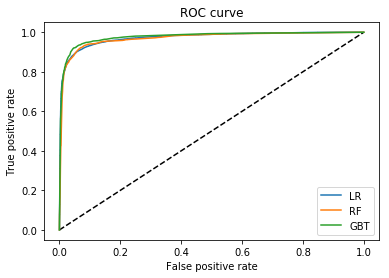

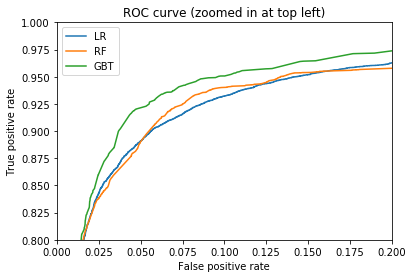

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

n_estimator = 10

lm = LogisticRegression()

lm = ModelSelect(lm,"Logit")
lm.fit(X_train, y_train)
y_pred_lm = lm.predict_proba(X_test)[:,1]
fpr_lm, tpr_lm, _ = roc_curve(y_test, y_pred_lm)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd.fit(X_train, y_train)
# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf.fit(X_train, y_train)
# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lm, tpr_lm, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lm, tpr_lm, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.svm import SVC, LinearSVC

lm = LogisticRegression()
grd = GradientBoostingClassifier(n_estimators=n_estimator)
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)

model_list = [lm, grd, rf]

fprs = []
tprs = []
for model in model_list:
    model = ModelSelect(model,model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)

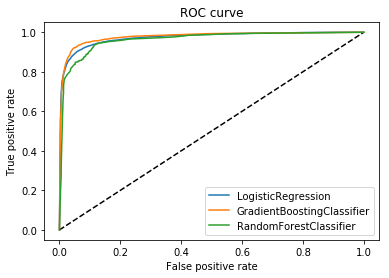

In [25]:
fig = plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for (fpr,tpr,model) in zip(fprs,tprs,model_list):
    plt.plot(fpr, tpr, label='{}'.format(model.__class__.__name__))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

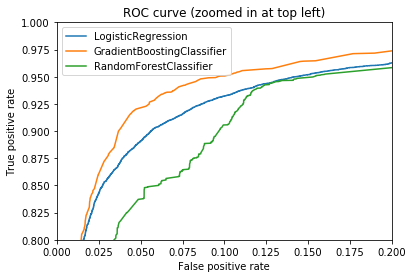

In [26]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
for fpr,tpr,model in zip(fprs,tprs,model_list):
    plt.plot(fpr, tpr, label='{}'.format(model.__class__.__name__))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

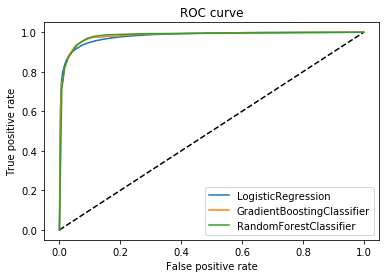

In [31]:
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

n_estimator = 10

lm = LogisticRegression()
grd = GradientBoostingClassifier(n_estimators=n_estimator)
rf1 = RandomForestClassifier(n_estimators=n_estimator) 


model_list = [lm, grd, rf1]

fprs = []
tprs = []
for model in model_list:
    model = ModelSelect(model,model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)
    fig = plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for (fpr,tpr,model) in zip(fprs,tprs,model_list):
    plt.plot(fpr, tpr, label='{}'.format(model.__class__.__name__))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [30]:
rf.feature_importances_

array([ 0.00765859,  0.00821713,  0.00780001,  0.19754392,  0.0084775 ,
        0.00901056,  0.00878192,  0.08893692,  0.00835194,  0.0083914 ,
        0.00801368,  0.4403881 ,  0.00812872,  0.00892268,  0.00823239,
        0.00850729,  0.00917623,  0.13956012,  0.00742116,  0.00847974])

In [33]:
rf1.feature_importances_

array([ 0.00833813,  0.008881  ,  0.00868168,  0.06542175,  0.00813497,
        0.00827933,  0.00847704,  0.56679348,  0.0091464 ,  0.18126477,
        0.00742466,  0.00843645,  0.00763764,  0.00922114,  0.00848998,
        0.00868936,  0.00862178,  0.00876068,  0.05173738,  0.00756238])

In [34]:
rf1.feature_importances_.shape

(20,)